<div align="center"> <h1>Clustering</h1>
    <h2><a href="...">Richard Leibrandt</a></h2>
</div>

In [1]:
from sklearn import cluster
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
import plotnine as pn
import hdbscan

In [2]:
import altair as alt
alt.data_transformers.disable_max_rows()
alt.renderers.enable('altair_viewer')
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [3]:
# We generate "moons" data
data, label = make_moons(n_samples=(100, 100), noise=0.1, random_state=0)

# data, label = make_moons(n_samples=200, noise=0.1, random_state=0)  # falls eine alte Version installiert ist

# DBSCAN

In [4]:
# We configure and fit the model:
dbscan = cluster.DBSCAN(eps=0.2)

# We fit the model:
dbscan.fit(data)

# We retrieve the labels:
cluster_dbscan = dbscan.labels_
cluster_dbscan[:5]

array([ 0,  1,  1, -1,  1])

In [5]:
# or we get fit and retrieve the labels in one step:
cluster_dbscan = dbscan.fit_predict(data)
cluster_dbscan[:5]

array([ 0,  1,  1, -1,  1])

In [6]:
# We build a DataFame...
data_np = np.concatenate([data, cluster_dbscan.reshape(-1, 1)], axis=1)
data_df = pd.DataFrame(data_np, columns=['x', 'y', 'cluster_dbscan'])

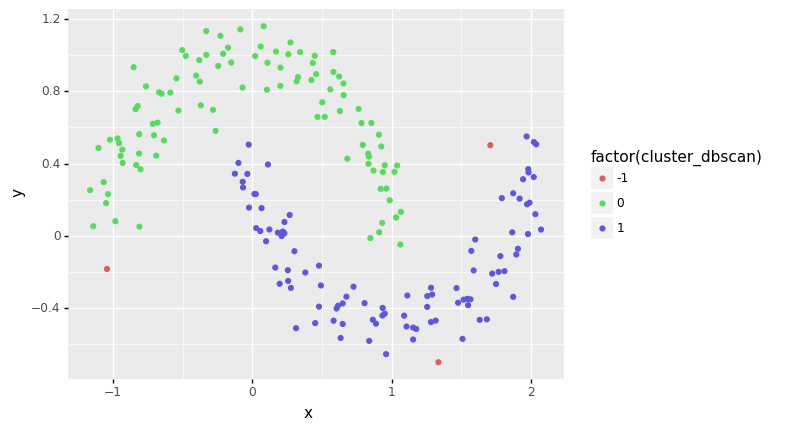

<ggplot: (8754027585458)>


In [7]:
# and plot:
gg = pn.ggplot(data=data_df, mapping=pn.aes(x='x', y='y', color='factor(cluster_dbscan)')) + \
     pn.geom_point()
print(gg)

In [8]:
# We build a DataFame...
data_np = np.concatenate([data, label.reshape(-1, 1), cluster_dbscan.reshape(-1, 1)], axis=1)
data_df = pd.DataFrame(data_np, columns=['x1', 'x2', 'class', 'cluster'])

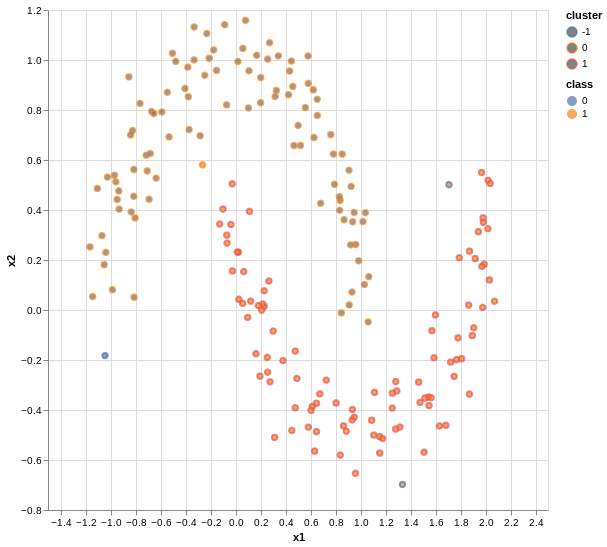

In [9]:
# and plot:
(alt.Chart(data_df).
 properties(height=500, width=500).
 mark_point().
 encode(x='x1',
        y='x2',
        color='cluster:N',
        fill='class:N')
) #.show()

# K-Means

In [10]:
data, label = make_moons(n_samples=200, noise=0.1, random_state=0)
my_clustering = cluster.KMeans(n_clusters=2)
my_clustering.fit(data)
nrs_clusters = my_clustering.labels_

data_np = np.concatenate([data, label.reshape(-1, 1), nrs_clusters.reshape(-1, 1)], axis=1)
data_df = pd.DataFrame(data_np, columns=['x1', 'x2', 'class', 'cluster'])

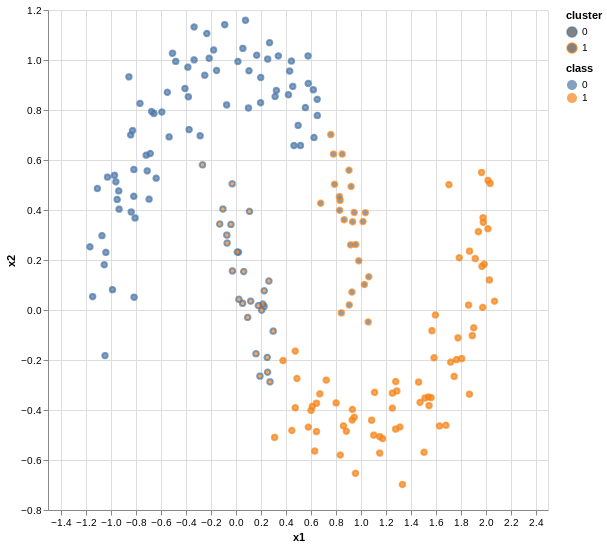

In [11]:
# VISUALISATION
(alt.Chart(data_df).
 properties(height=500, width=500).
 mark_point().
 encode(x='x1',
        y='x2',
        color='cluster:N',
        fill='class:N')
 ) #.show()

# HDBSCAN

In [12]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
cluster_hdbscan = clusterer.fit_predict(data)

In [13]:
data_np = np.concatenate([data, cluster_hdbscan.reshape(-1, 1)], axis=1)
data_df = pd.DataFrame(data_np, columns=['x', 'y', 'cluster_hdbscan'])

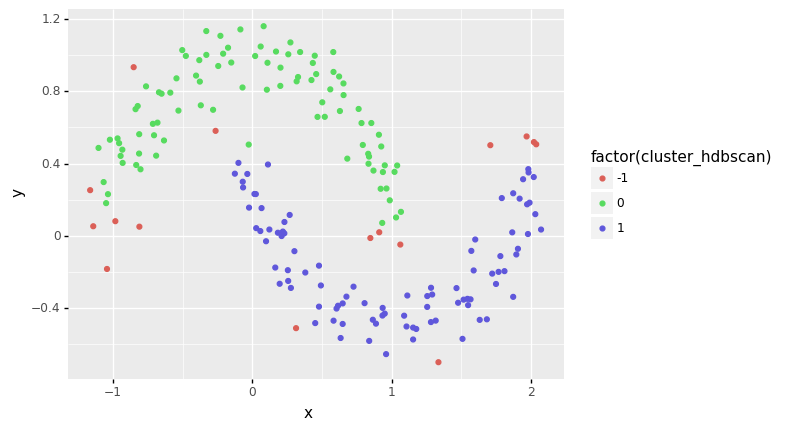

<ggplot: (8754026976263)>


In [14]:
# VISUALISATION
gg = pn.ggplot(data=data_df, mapping=pn.aes(x='x', y='y', color='factor(cluster_hdbscan)')) + \
     pn.geom_point()
print(gg)

# DBSCAN with noise

In [15]:
# We repeat everything, but with more noise:

data, label = make_moons(n_samples=200, noise=0.2, random_state=0)
my_clustering = cluster.DBSCAN(eps=0.20)
my_clustering.fit(data)
nrs_clusters = my_clustering.labels_

data_np = np.concatenate([data, label.reshape(-1, 1), nrs_clusters.reshape(-1, 1)], axis=1)
data_df = pd.DataFrame(data_np, columns=['x1', 'x2', 'class', 'cluster'])

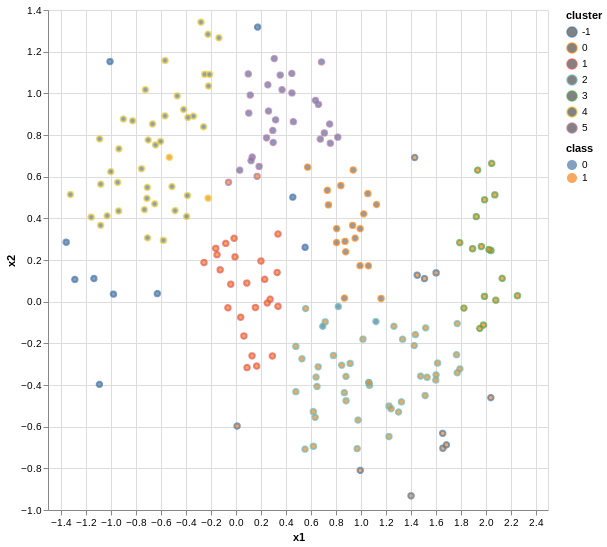

In [16]:
# VISUALISATION
(alt.Chart(data_df).
 properties(height=500, width=500).
 mark_point().
 encode(x='x1',
        y='x2',
        color='cluster:N',
        fill='class:N')
 ) #.show()

# Using a list for DBSCAN and K-Means

In [17]:
# Using a list:

results = []
for my_clustering in [cluster.DBSCAN(eps=0.20), cluster.KMeans(n_clusters=2), cluster.KMeans(n_clusters=3), cluster.KMeans(n_clusters=3)]:
    my_clustering.fit(data)
    nrs_clusters = my_clustering.labels_
    results.append(nrs_clusters)